<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Put_Call_Parity_Payoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Étape 1 : Initialisation des paramètres

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Initialisation des paramètres
S0 = 9.814  # Prix initial de l'action
K = 9.81    # Strike (prix d'exercice)
T = 0.25    # Temps jusqu'à maturité (en années)
r = -0.1049  # Taux sans risque annualisé
sigma = 0.1556  # Volatilité annualisée
n_simulations = 10000  # Nombre de simulations Monte Carlo

print(f"Paramètres initiaux : S0={S0}, K={K}, T={T}, r={r}, sigma={sigma}, n_simulations={n_simulations}")


Paramètres initiaux : S0=9.814, K=9.81, T=0.25, r=-0.1049, sigma=0.1556, n_simulations=10000


# Étape 2 : Calcul des variables

In [4]:
# Calcul de d1 et d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

print(f"d1 = {d1}, d2 = {d2}")


d1 = -0.29294236387609257, d2 = -0.37074236387609255


# Étape 3 : Simulation Monte Carlo

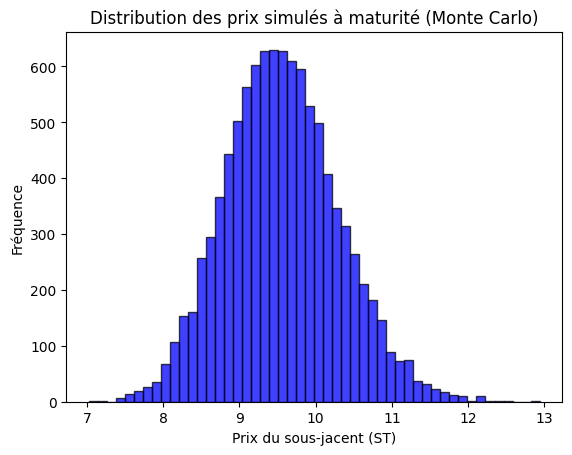

In [5]:
# Simulation des prix du sous-jacent à maturité
np.random.seed(42)  # Pour la reproductibilité
Z = np.random.normal(0, 1, n_simulations)  # Variables aléatoires standard
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

# Visualisation des prix simulés
plt.hist(ST, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution des prix simulés à maturité (Monte Carlo)')
plt.xlabel('Prix du sous-jacent (ST)')
plt.ylabel('Fréquence')
plt.show()


# Étape 4 : Calcul des payoffs

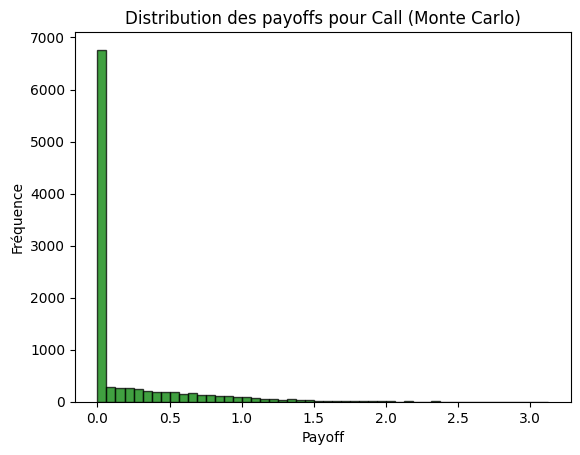

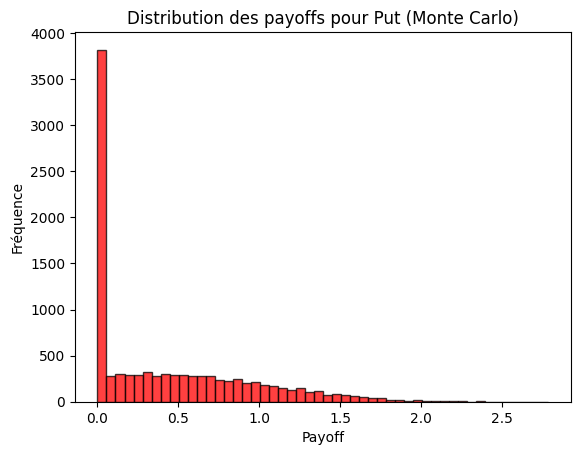

In [6]:
# Calcul des payoffs pour Call et Put
payoff_call = np.maximum(ST - K, 0)  # Max(ST - K, 0)
payoff_put = np.maximum(K - ST, 0)  # Max(K - ST, 0)

# Visualisation des payoffs (Call)
plt.hist(payoff_call, bins=50, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution des payoffs pour Call (Monte Carlo)')
plt.xlabel('Payoff')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des payoffs (Put)
plt.hist(payoff_put, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution des payoffs pour Put (Monte Carlo)')
plt.xlabel('Payoff')
plt.ylabel('Fréquence')
plt.show()


# Étape 5 : Calcul des prix d'options

In [7]:
# Calcul des prix des options
call_price = np.exp(-r * T) * np.mean(payoff_call)
put_price = np.exp(-r * T) * np.mean(payoff_put)

print(f"Prix estimé de l'option Call : {call_price:.4f}")
print(f"Prix estimé de l'option Put : {put_price:.4f}")


Prix estimé de l'option Call : 0.1971
Prix estimé de l'option Put : 0.4552
